In [1]:
%tensorflow_version 2.x
import tensorflow as tf

# layers
from tensorflow.keras.layers import Input, Dense, Flatten, SimpleRNN, LSTM, GlobalMaxPooling1D
# model
from tensorflow.keras.models import Model

# dataset
from tensorflow.keras.datasets import mnist


# additional imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

TensorFlow 2.x selected.


In [2]:
# load the data in
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# now look at the shapes
print('Train data shape:\n X \t\t Y')
x_train, x_test = x_train / 255.0, x_test / 255.0
print(x_train.shape, y_train.shape)
print('Test data shape:\n X \t\t Y')
print(x_test.shape, y_test.shape)
# Now we may think the data is in the shape of NxTxD which allows us to use RNN!
N,T,D = x_train.shape

11493376/11490434 [==============================] - 0s 0us/step
Train data shape:
 X 		 Y
(60000, 28, 28) (60000,)
Test data shape:
 X 		 Y
(10000, 28, 28) (10000,)


In [6]:
# build the model
i = Input(shape = (T,D))
x = LSTM(128)(i)
x = Dense(10, activation = 'softmax')(x)

lstm_model = Model(i, x)

lstm_model.compile(loss = 'sparse_categorical_crossentropy',
                   optimizer = 'adam',
                   metrics = ['accuracy'])

r = lstm_model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 15)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 11s 184us/sample - loss: 0.3214 - accuracy: 0.8974 - val_loss: 0.1173 - val_accuracy: 0.9633
Epoch 2/15
60000/60000 [==============================] - 10s 161us/sample - loss: 0.0998 - accuracy: 0.9694 - val_loss: 0.0710 - val_accuracy: 0.9770
Epoch 3/15
60000/60000 [==============================] - 10s 164us/sample - loss: 0.0725 - accuracy: 0.9782 - val_loss: 0.0602 - val_accuracy: 0.9816
Epoch 4/15
60000/60000 [==============================] - 10s 165us/sample - loss: 0.0551 - accuracy: 0.9832 - val_loss: 0.0579 - val_accuracy: 0.9820
Epoch 5/15
60000/60000 [==============================] - 10s 163us/sample - loss: 0.0455 - accuracy: 0.9862 - val_loss: 0.0531 - val_accuracy: 0.9837
Epoch 6/15
60000/60000 [==============================] - 10s 165us/sample - loss: 0.0378 - accuracy: 0.9881 - val_loss: 0.0529 - val_accuracy: 0.9843
Epoch 7/15
60000/60000 [====================

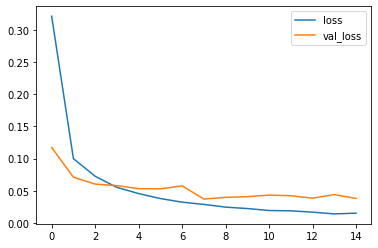

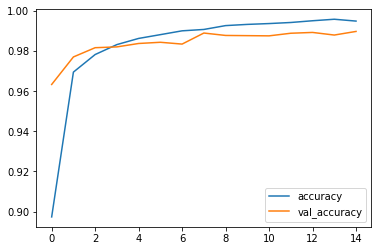

In [7]:
# plotting the results

# loss
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()
# accuracy
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()

Confusion matrix, without normalization
[[ 977    0    0    0    0    0    2    1    0    0]
 [   0 1134    1    0    0    0    0    0    0    0]
 [   2    1 1010    9    0    0    0    3    7    0]
 [   0    0    0 1002    1    3    0    1    3    0]
 [   0    0    0    0  970    0    1    1    1    9]
 [   0    0    0    5    0  883    3    0    1    0]
 [   2    3    0    2    1    2  948    0    0    0]
 [   1    4    6    1    1    0    0 1008    0    7]
 [   1    0    0    1    0    2    0    2  966    2]
 [   1    0    0    0    6    1    0    1    1  999]]


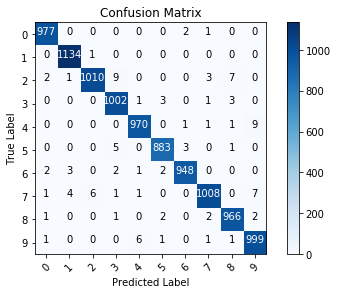

In [9]:
# Plot confusion matrix
# Code source: 
# https://colab.research.google.com/drive/11OHqNJQhT7rnNc2rmv7bs8uICkncgqWm

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion Matrix',
                          cmap = plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting 'normalize=True'.
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('Confusion matrix, without normalization')
  print(cm)

  plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment='center',
             color = 'white' if cm[i, j] > thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()

p_test = lstm_model.predict(x_test).argmax(axis = 1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))